# Pandas Practice 2

![IRIS, https://github.com/simonava5/fishers-iris-data](./images/iris.png)

After the notebook with a lot of new input, let's start applying it totally by yourselves. 
For this purpose we will use one of the most standard real-life datasets: Its called Iris Dataset, and is all about the plant iris. Let's learn a little bit more about the dataset by looking at it. 

## Learning Objectives





By the end of this notebook, you will feel more comfortable with your newly acquired knowledge, as you will see that you can

- load data from csv files into DataFrames
- access data stored in DataFrames
- use the general functions of a DataFrame to answer questions about the data
- create insightful plots using the pandas function `.plot()`
- explain what conclusions you draw from these visualizations.


In [55]:
# import pandas
import pandas as pd

In [56]:
# load the data
df = pd.read_csv('data/iris.csv')

Let us first have a look at the head of the table, maybe also on the last 10 rows...

In [57]:
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


How many irises are in the data set?

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


How many different species are there?

In [59]:
df['species'].nunique()

3

Calculate the mean, median, mode for petal length

In [60]:
print(df['petal_length'].mean())
print(df['petal_length'].median())
print(df['petal_length'].mode())

3.758666666666666
4.35
0    1.5
Name: petal_length, dtype: float64


What can you conclude about the distribution for petal length?

What is the smallest and largest value for petal length?

In [61]:
print(df['petal_length'].min())
print(df['petal_length'].max())

1.0
6.9


Calculate the variance and standard deviation for petal length

In [62]:
print(df['petal_length'].var())
print(df['petal_length'].std())

3.113179418344519
1.7644204199522626


Calculate the basic descriptive statistics for all columns of the iris data set with a single command.

In [63]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


What is the overall average for sepal length?

In [64]:
print(df['sepal_length'].mean())

5.843333333333334


Use the DataFrame grouping function to determine the count by species.

In [65]:
df.groupby('species')['species'].count()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

Use the DataFrame grouping function to determine the average length and width of sepals and pedals by species.

In [66]:
df.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


Add the sum of the sepal width and length as a new column to your DataFrame.

In [67]:
df['sepal_len_wid'] = df['sepal_length'] + df['sepal_width']

Visualize petal length with a histogram

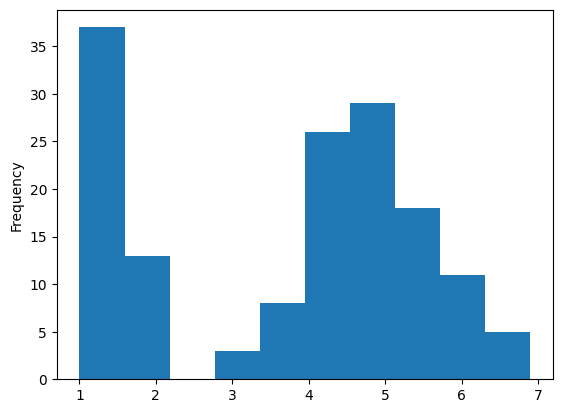

In [68]:
df['petal_length'].plot(kind='hist');

Describe the distribution

Many instances with a short length of 1, and then approximately normal distribution around 5

Which is more informative: the summary statistics or visualizations?

Visuals

Visualize petal length and width with a "scatter_matrix"

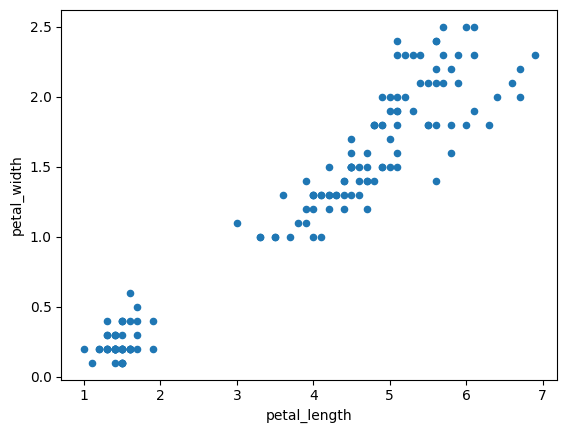

In [69]:
df.plot(kind='scatter', x='petal_length', y='petal_width');

Create a new column with a rough estimate of petal area by multiplying petal length and width together.

In [70]:
df['petal_area'] = df['petal_length'] * df['petal_width']

Create a new DataFrame with petal areas greater than $1cm^2$.

In [71]:
df_area = df[df['petal_area'] > 1]
df_area.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_len_wid,petal_area
50,7.0,3.2,4.7,1.4,Iris-versicolor,10.2,6.58
51,6.4,3.2,4.5,1.5,Iris-versicolor,9.6,6.75
52,6.9,3.1,4.9,1.5,Iris-versicolor,10.0,7.35
53,5.5,2.3,4.0,1.3,Iris-versicolor,7.8,5.20
54,6.5,2.8,4.6,1.5,Iris-versicolor,9.3,6.90


Create 3 new DataFrames, one for each species. Use the entire dataset.

In [72]:
dfs = {spec: df[df["species"] == spec] for spec in df["species"].unique()}
for spec, spec_df in dfs.items():
    print(spec)
    print(spec_df.head())

Iris-setosa
   sepal_length  sepal_width  petal_length  petal_width      species  \
0           5.1          3.5           1.4          0.2  Iris-setosa   
1           4.9          3.0           1.4          0.2  Iris-setosa   
2           4.7          3.2           1.3          0.2  Iris-setosa   
3           4.6          3.1           1.5          0.2  Iris-setosa   
4           5.0          3.6           1.4          0.2  Iris-setosa   

   sepal_len_wid  petal_area  
0            8.6        0.28  
1            7.9        0.28  
2            7.9        0.26  
3            7.7        0.30  
4            8.6        0.28  
Iris-versicolor
    sepal_length  sepal_width  petal_length  petal_width          species  \
50           7.0          3.2           4.7          1.4  Iris-versicolor   
51           6.4          3.2           4.5          1.5  Iris-versicolor   
52           6.9          3.1           4.9          1.5  Iris-versicolor   
53           5.5          2.3           4.0  